In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.ndimage.filters import gaussian_filter

In [3]:
figsize(8, 6)

In [4]:
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
hplanck=6.626068e-34 #MKS
TCMB = 2.72548 #Kelvin
d2r = np.pi / 180.

In [5]:
# beam is 2.8' x 3.2'

In [6]:
z = np.load('../externaldata/cgps.npz')
dlons = z['lons']
dlats = z['lats']
dsig = z['signal']

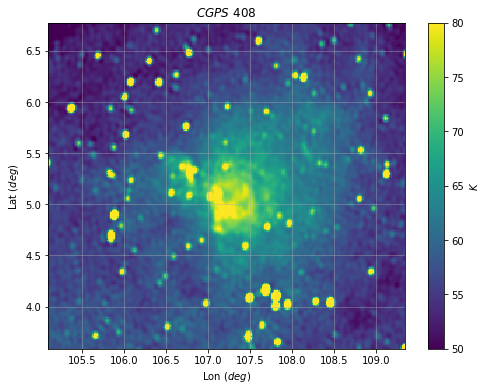

In [7]:
pcolormesh(dlons, dlats, dsig)
clim(50, 80)
cm = colorbar();
xlabel('$\mathrm{Lon}\ (deg)$')
ylabel('$\mathrm{Lat}\ (deg)$')
cm.set_label('$K$')
title('$CGPS\ 408~MHz$')
grid(alpha=0.5)

In [8]:
(dlats.max() - dlats.min())/256 * 60.

0.74707025273437511

In [9]:
(dlons.max() - dlons.min()) / 256 * 60

0.9960937101562517

In [10]:
sigma1 = np.sqrt(60.**2 - 3.2**2) / 0.7471 / (2. * np.sqrt(2. * np.log(2)))
sigma2 = np.sqrt(60.**2 - 2.8**2)  / 0.9961 / (2. * np.sqrt(2. * np.log(2)))

In [11]:
smthsig = gaussian_filter(dsig, [sigma1, sigma2])

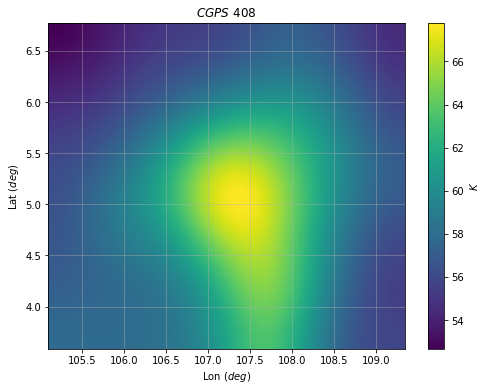

In [12]:
pcolormesh(dlons, dlats, smthsig)
#clim(50, 80)
cm = colorbar();
xlabel('$\mathrm{Lon}\ (deg)$')
ylabel('$\mathrm{Lat}\ (deg)$')
cm.set_label('$K$')
title('$CGPS\ 408~MHz$')
grid(alpha=0.5)

In [16]:
area = (((dlons.max() - dlons.min())/256) * ((dlats.max() - dlats.min())/256)) * d2r * d2r
nu = 408.e6
datajy = smthsig * 2. * kboltz * (nu / clight)**2 * area * 1.e26

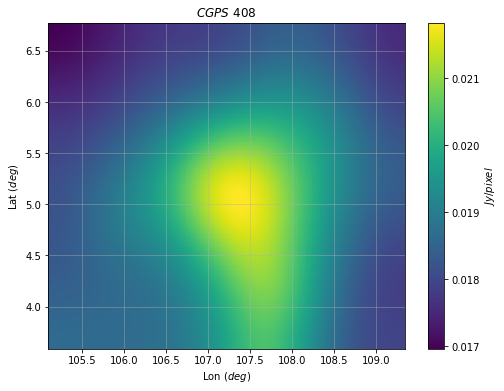

In [17]:
pcolormesh(dlons, dlats, datajy)
#clim(50, 80)
cm = colorbar();
xlabel('$\mathrm{Lon}\ (deg)$')
ylabel('$\mathrm{Lat}\ (deg)$')
cm.set_label('$Jy/pixel$')
title('$CGPS\ 408~MHz$')
grid(alpha=0.5)

In [18]:
lonc = 107.2
latc = 5.2
lonsq = (dlons - lonc)**2
latsq = (dlats - latc)**2
biglon = np.ones((256, 256)) * lonsq
biglat = np.transpose(np.ones((256, 256)) * latsq)
radius = np.sqrt(biglon + biglat).flatten()
annulus = (radius > (67./60.)) * (radius < (90./60.))
dataflat = datajy.flatten()
adata = dataflat[annulus]
rmask = radius <= 1.
rdata = dataflat[rmask]
print np.sum(rdata - np.median(adata))
print np.std(adata) * np.sqrt(len(rdata) + pi/2. * float(len(rdata)**2) / len(adata))

21.3762
0.147034389658
